In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 7.0)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from Bio import SeqIO
from nltk import bigrams
from nltk import trigrams


from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import dask.dataframe as dd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from scipy import interp
from itertools import cycle


In [4]:
"""
Writing a method to build tri-grams
input: fasta_file
output: a csv type file of tri-gram values
"""


def build_tri_grams(input_file, output_file):
    tri_dic = defaultdict(int)

    out_handle = open(output_file, "w")
    for rec in SeqIO.parse(input_file, "fasta"):
        tok = rec.description.split("|")[-1]
        #print tok
        #print tok[0], tok[-1]
        #if tok == 'toxin':
        tri_tokens = trigrams(rec.seq)

        # tri_tokens is a generator - you can only go through it once
        for item in ((tri_tokens)):
            if '-' in item:
                continue
            tri_str = item[0] + item[1] + item[2]
            #print bi_str
            tri_dic[tri_str] += 1

        for index, item in enumerate(sorted(all_tri_grams)):
            if index > 0:
                out_handle.write(',')
            out_handle.write("%s" % tri_dic[item])
        out_handle.write("\n")
        tri_dic.update({}.fromkeys(tri_dic, 0)) # setting all key values to be zero again


    out_handle.close()

In [6]:
build_tri_grams('less_than_30_pos_neg_bacteriocin.fa', 'less_than_30_pos_neg_bacteriocin_trigrams')

In [5]:
final_bac_data = pd.read_csv("less_than_30_pos_neg_bacteriocin_trigrams", names=sorted(all_tri_grams))

# taking the values from panda into numpy array
final_bac_array = final_bac_data.values
print final_bac_array.shape

(692, 8000)


In [6]:
y = np.vstack((np.ones((346, 1)), np.zeros((346,1))))

print final_bac_array.shape
print y.shape

(692, 8000)
(692, 1)


# TruncatedSVD

In [162]:
"""
Compressing the test data
"""
x_test_truncated_compressed = tsvd.transform(x_test)
print x_test_truncated_compressed.shape

(505, 256)


In [8]:
# display a 2D plot of the digit classes in the latent space
# plt.cm.get_cmap("brg", 3)
#import matplotlib
#x_test_encoded = encoder.predict(x_test)
#print x_test_encoded.shape
#colors = ['red','green','blue','purple']
X_reduced = TruncatedSVD(n_components=200, random_state=0).fit_transform(final_bac_array)
X_embedded = TSNE(n_components=2, perplexity=30, verbose=2).fit_transform(X_reduced)
vis_x = X_embedded[:, 0]
vis_y = X_embedded[:, 1]

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 692 / 692
[t-SNE] Mean sigma: 1.470305
[t-SNE] Iteration 25: error = 1.2395595, gradient norm = 0.0154324
[t-SNE] Iteration 50: error = 1.2599550, gradient norm = 0.0138820
[t-SNE] Iteration 75: error = 1.0850648, gradient norm = 0.0143220
[t-SNE] Iteration 100: error = 1.1383300, gradient norm = 0.0137383
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.138330
[t-SNE] Iteration 125: error = 1.0328325, gradient norm = 0.0128541
[t-SNE] Iteration 150: error = 1.0861367, gradient norm = 0.0127409
[t-SNE] Iteration 175: error = 1.1027811, gradient norm = 0.0114554
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 1.138330


In [165]:
print tsvd.explained_variance_ratio_.sum()

0.624855055807


In [10]:
print X_reduced.shape

(692, 200)


## SVM with input compressed - TruncatedSVD

/home/nafizh/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'clf__gamma': 0.0001, 'clf__C': 1000.0, 'clf__kernel': 'rbf'}
Precision 0.866666666667
Recall: 0.742857142857
F1: 0.8
{'clf__gamma': 0.001, 'clf__C': 100.0, 'clf__kernel': 'rbf'}
Precision 0.896551724138
Recall: 0.742857142857
F1: 0.8125
{'clf__gamma': 0.01, 'clf__C': 10.0, 'clf__kernel': 'rbf'}
Precision 0.85
Recall: 0.971428571429
F1: 0.906666666667
{'clf__C': 1.0, 'clf__kernel': 'linear'}
Precision 0.815789473684
Recall: 0.885714285714
F1: 0.849315068493
{'clf__C': 0.1, 'clf__kernel': 'linear'}
Precision 0.931034482759
Recall: 0.771428571429
F1: 0.84375
{'clf__C': 0.1, 'clf__kernel': 'linear'}
Precision 0.970588235294
Recall: 0.942857142857
F1: 0.95652173913
{'clf__gamma': 0.001, 'clf__C': 1000.0, 'clf__kernel': 'rbf'}
Precision 0.65625
Recall: 0.617647058824
F1: 0.636363636364
{'clf__gamma': 0.0001, 'clf__C': 1000.0, 'clf__kernel': 'rbf'}
Precision 0.90625
Recall: 0.852941176471
F1: 0.878787878788
{'clf__C': 0.1, 'clf__kernel': 'linear'}
Precision 0.857142857143
Recall: 0.70588235

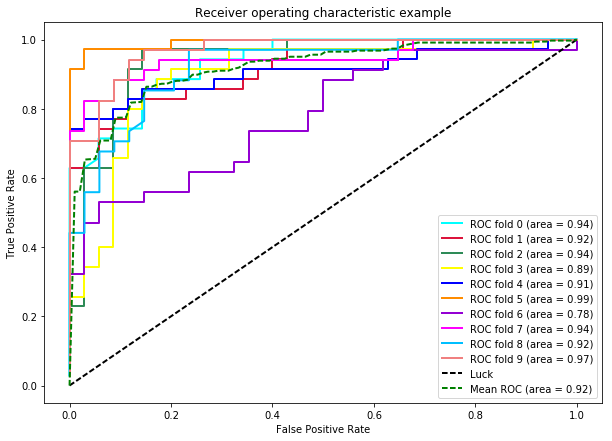

In [15]:
"""
Manual nested cross validation and ROC curve from that

10-fold-------------------------------------------


"""

# ROC curve stuff
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
               'deepskyblue', 'lightcoral'])
lw = 2
i = 0



# Dividing data set for outer cv
cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 43)

precision_scores = []
recall_scores = []
f1_scores = []


# Outer cv
for (train, test), color in zip(cv_outer.split(X_reduced, y), colors):
    pipe_svc = Pipeline([('clf', SVC(random_state=1, probability = True))])
    param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
    param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']}, {'clf__C': param_range, 
             'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

    
    #Inner cv
    cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='f1', cv= cv_inner)
    
    gs.fit(X_reduced[train], y[train])
    
    print gs.best_params_
    
    scores = gs.best_estimator_.predict(X_reduced[test])
    precision_s = precision_score(y[test], scores)
    recall_s = recall_score(y[test], scores)
    f1_s = f1_score(y[test], scores)
    #print scores
    
    precision_scores.append(precision_s)
    recall_scores.append(recall_s)
    f1_scores.append(f1_s)
    print "Precision", precision_s
    print "Recall:", recall_s
    print "F1:", f1_s
    
    probas_ = gs.best_estimator_.predict_proba(X_reduced[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1
    #break
    
print "Precision mean and std:", np.mean(precision_scores), np.std(precision_scores) 
print "Recall mean and std:", np.mean(recall_scores), np.std(recall_scores)
print "F1 meand and std:", np.mean(f1_scores), np.std(f1_scores)

# Draw ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv_outer.get_n_splits(X_reduced, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
"""
10 fold Manual nested cross validation 50 times
"""
colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
               'deepskyblue', 'lightcoral'])

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93, 103,113,123,133,143,153,163,173,183,193,
                         203,213,223,233,243,253,263,273,283,293, 303,313,323,333,343,353,363,373,383,393,
                          403,413,423,433,443,453,463,473,483,493]
random_seed_list = [2,12,22,32,42,52,62,72,82,92, 102,112,122,132,142,152,162,172,182,192,
                   202,212,222,232,242,252,262,272,282,292, 302,312,322,332,342,352,362,372,382,392,
                   402,412,422,432,442,452,462,472,482,492]

precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []

precision_scores_std_list = []
recall_scores_std_list = []
f1_scores_std_list = []

# Outer cv
for index, rand_seed_i in enumerate(random_seed_list):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    for (train, test), color in zip(cv_outer.split(X_reduced, y), colors):
        pipe_svc = Pipeline([('clf', SVC(random_state=1, probability = True))])
        param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
        param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']}, {'clf__C': param_range, 
             'clf__gamma': param_range, 'clf__kernel': ['rbf']}]


        #Inner cv
        cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rand_seed_i)
        gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='f1', cv= cv_inner)

        gs.fit(X_reduced[train], y[train])

        scores = gs.best_estimator_.predict(X_reduced[test])
        precision_s = precision_score(y[test], scores)
        recall_s = recall_score(y[test], scores)
        f1_s = f1_score(y[test], scores)
        #print scores

        precision_scores.append(precision_s)
        recall_scores.append(recall_s)
        f1_scores.append(f1_s)
        
    print 'Loop:', index
    print 'Precision:', np.mean(precision_scores), np.std(precision_scores) 
    print 'Recall:', np.mean(recall_scores), np.std(recall_scores)
    print 'F1:', np.mean(f1_scores), np.std(f1_scores)
    
    precision_scores_mean_list.append(np.mean(precision_scores))
    recall_scores_mean_list.append(np.mean(recall_scores))
    f1_scores_mean_list.append(np.mean(f1_scores))
    
    precision_scores_std_list.append(np.std(precision_scores))
    recall_scores_std_list.append(np.std(recall_scores))
    f1_scores_std_list.append(np.std(f1_scores))
    
print 'Precision for 10 times:', np.mean(precision_scores_mean_list), np.std(precision_scores_std_list)
print 'Recall for 10 times:', np.mean(recall_scores_mean_list), np.std(recall_scores_std_list)
print 'F1 for 10 times:', np.mean(f1_scores_mean_list), np.std(f1_scores_std_list)

/home/nafizh/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Loop: 0
Precision: 0.863250357701 0.073897763811
Recall: 0.812016806723 0.0684490277643
F1: 0.834973693018 0.059418638524
Loop: 1
Precision: 0.874643389162 0.0471498459682
Recall: 0.82025210084 0.0581564212991
F1: 0.844522664059 0.034746856775
Loop: 2
Precision: 0.879110091758 0.0616120588179
Recall: 0.823697478992 0.0542310519078
F1: 0.848334961192 0.0388795582776
Loop: 3
Precision: 0.868021681774 0.0458344706758
Recall: 0.803697478992 0.0520142951566
F1: 0.833426779577 0.0386152482079
Loop: 4
Precision: 0.857318911301 0.0756605296052
Recall: 0.823193277311 0.0908995135257
F1: 0.83795122907 0.0725071424887
Loop: 5
Precision: 0.883513646639 0.0436232492622
Recall: 0.789159663866 0.0797916306939
F1: 0.829341350833 0.0303233221093
Loop: 6
Precision: 0.853976282432 0.0397788922904
Recall: 0.835462184874 0.0633223248776
F1: 0.843162717886 0.0403681163447
Loop: 7
Precision: 0.879670775952 0.0422222838485
Recall: 0.814705882353 0.113215609209
F1: 0.840134794251 0.0640048524641
Loop: 8
Precis

In [3]:
import numpy as np
from scipy import stats
precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []
with open('temp.txt', 'r') as in_handle:
    for line in in_handle:
        if line.split()[0] == 'Precision:':
            precision_scores_mean_list.append(float(line.split()[1]))
        if line.split()[0] == 'Recall:':
            recall_scores_mean_list.append(float(line.split()[1]))
        if line.split()[0] == 'F1:':
            f1_scores_mean_list.append(float(line.split()[1]))
            
print 'Precision mean for 50 times:', np.mean(precision_scores_mean_list), 'Std. error:', stats.sem(precision_scores_mean_list)
print 'Recall mean for 50 times:', np.mean(recall_scores_mean_list), 'Std. error:', stats.sem(recall_scores_mean_list)
print 'F1 mean for 50 times:', np.mean(f1_scores_mean_list), 'Std. error:', stats.sem(f1_scores_mean_list)
            


Precision mean for 50 times: 0.87551524331 Std. error: 0.00184467473379
Recall mean for 50 times: 0.808959663866 Std. error: 0.00202949034298
F1 mean for 50 times: 0.838121833636 Std. error: 0.00121989033008


## Logistic Regression Classifier - input compressed

{'logis__penalty': 'l2', 'logis__C': 0.001}
Precision 0.810810810811
Recall: 0.857142857143
F1: 0.833333333333
{'logis__penalty': 'l2', 'logis__C': 0.01}
Precision 0.9
Recall: 0.771428571429
F1: 0.830769230769
{'logis__penalty': 'l2', 'logis__C': 0.001}
Precision 0.785714285714
Recall: 0.942857142857
F1: 0.857142857143
{'logis__penalty': 'l1', 'logis__C': 1.0}
Precision 0.857142857143
Recall: 0.857142857143
F1: 0.857142857143
{'logis__penalty': 'l2', 'logis__C': 0.001}
Precision 0.833333333333
Recall: 0.857142857143
F1: 0.845070422535
{'logis__penalty': 'l2', 'logis__C': 0.001}
Precision 0.813953488372
Recall: 1.0
F1: 0.897435897436
{'logis__penalty': 'l2', 'logis__C': 0.01}
Precision 0.88
Recall: 0.647058823529
F1: 0.745762711864
{'logis__penalty': 'l2', 'logis__C': 0.1}
Precision 0.933333333333
Recall: 0.823529411765
F1: 0.875
{'logis__penalty': 'l2', 'logis__C': 0.1}
Precision 0.866666666667
Recall: 0.764705882353
F1: 0.8125
{'logis__penalty': 'l2', 'logis__C': 0.1}
Precision 0.9642

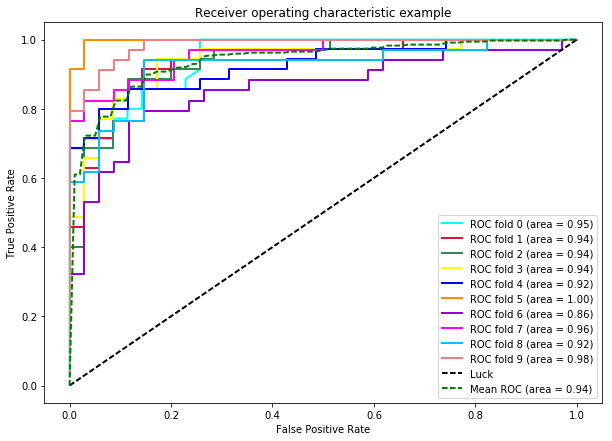

In [16]:
"""
Manual nested cross validation and ROC curve from that

10-fold-------------------------------------------


"""

# ROC curve stuff
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
               'deepskyblue', 'lightcoral'])
lw = 2
i = 0



# Dividing data set for outer cv
cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 43)

precision_scores = []
recall_scores = []
f1_scores = []


# Outer cv
for (train, test), color in zip(cv_outer.split(X_reduced, y), colors):
    pipe_logis = Pipeline([('logis', LogisticRegression(random_state = 1))])
    param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
    param_grid = [{'logis__C': param_range, 'logis__penalty': ['l1']}, 
             {'logis__C': param_range, 'logis__penalty': ['l2']}]

    
    #Inner cv
    cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    gs = GridSearchCV(estimator=pipe_logis, param_grid=param_grid, scoring='f1', cv= cv_inner)
    
    gs.fit(X_reduced[train], y[train])
    
    print gs.best_params_
    
    scores = gs.best_estimator_.predict(X_reduced[test])
    precision_s = precision_score(y[test], scores)
    recall_s = recall_score(y[test], scores)
    f1_s = f1_score(y[test], scores)
    #print scores
    
    precision_scores.append(precision_s)
    recall_scores.append(recall_s)
    f1_scores.append(f1_s)
    print "Precision", precision_s
    print "Recall:", recall_s
    print "F1:", f1_s
    
    probas_ = gs.best_estimator_.predict_proba(X_reduced[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1
    #break
    
print "Precision mean and std:", np.mean(precision_scores), np.std(precision_scores) 
print "Recall mean and std:", np.mean(recall_scores), np.std(recall_scores)
print "F1 mean and std:", np.mean(f1_scores), np.std(f1_scores)

# Draw ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv_outer.get_n_splits(X_reduced, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
"""
10 fold Manual nested cross validation 50 times
"""
colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
               'deepskyblue', 'lightcoral'])

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93, 103,113,123,133,143,153,163,173,183,193,
                         203,213,223,233,243,253,263,273,283,293, 303,313,323,333,343,353,363,373,383,393,
                          403,413,423,433,443,453,463,473,483,493]
random_seed_list = [2,12,22,32,42,52,62,72,82,92, 102,112,122,132,142,152,162,172,182,192,
                   202,212,222,232,242,252,262,272,282,292, 302,312,322,332,342,352,362,372,382,392,
                   402,412,422,432,442,452,462,472,482,492]

precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []

precision_scores_std_list = []
recall_scores_std_list = []
f1_scores_std_list = []

# Outer cv
for index, rand_seed_i in enumerate(random_seed_list):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    for (train, test), color in zip(cv_outer.split(X_reduced, y), colors):
        pipe_logis = Pipeline([('logis', LogisticRegression(random_state = 1))])
        param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
        param_grid = [{'logis__C': param_range, 'logis__penalty': ['l1']}, 
                 {'logis__C': param_range, 'logis__penalty': ['l2']}]


        #Inner cv
        cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rand_seed_i)
        gs = GridSearchCV(estimator=pipe_logis, param_grid=param_grid, scoring='f1', cv= cv_inner)

        gs.fit(X_reduced[train], y[train])

        scores = gs.best_estimator_.predict(X_reduced[test])
        precision_s = precision_score(y[test], scores)
        recall_s = recall_score(y[test], scores)
        f1_s = f1_score(y[test], scores)
        #print scores

        precision_scores.append(precision_s)
        recall_scores.append(recall_s)
        f1_scores.append(f1_s)
        
    print 'Loop:', index
    print 'Precision:', np.mean(precision_scores), np.std(precision_scores) 
    print 'Recall:', np.mean(recall_scores), np.std(recall_scores)
    print 'F1:', np.mean(f1_scores), np.std(f1_scores)
    
    precision_scores_mean_list.append(np.mean(precision_scores))
    recall_scores_mean_list.append(np.mean(recall_scores))
    f1_scores_mean_list.append(np.mean(f1_scores))
    
    precision_scores_std_list.append(np.std(precision_scores))
    recall_scores_std_list.append(np.std(recall_scores))
    f1_scores_std_list.append(np.std(f1_scores))
    
print 'Precision for 10 times:', np.mean(precision_scores_mean_list), np.std(precision_scores_std_list)
print 'Recall for 10 times:', np.mean(recall_scores_mean_list), np.std(recall_scores_std_list)
print 'F1 for 10 times:', np.mean(f1_scores_mean_list), np.std(f1_scores_std_list)

/home/nafizh/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Loop: 0
Precision: 0.88496689757 0.0548317531131
Recall: 0.835630252101 0.0860006749595
F1: 0.856229277815 0.0513425886161
Loop: 1
Precision: 0.874164391323 0.0560657466912
Recall: 0.834705882353 0.0783327160627
F1: 0.852418694294 0.0593409258198
Loop: 2
Precision: 0.869871915299 0.0741835227313
Recall: 0.849579831933 0.0785289509049
F1: 0.854589593441 0.0405960353276
Loop: 3
Precision: 0.870032700275 0.0559338519501
Recall: 0.838571428571 0.0527506910581
F1: 0.852046435324 0.0343910629088
Loop: 4
Precision: 0.842259047259 0.0463500667436
Recall: 0.840672268908 0.108689089924
F1: 0.837762148439 0.0659068422082
Loop: 5
Precision: 0.851265429576 0.0623851652553
Recall: 0.829663865546 0.0608731166623
F1: 0.836763404066 0.0291751399136
Loop: 6
Precision: 0.868552908626 0.0740064946645
Recall: 0.855546218487 0.0639389781294
F1: 0.858564146621 0.0448670533433
Loop: 7
Precision: 0.88555634584 0.0466037928172
Recall: 0.840588235294 0.0699491376546
F1: 0.859861328289 0.0392882699941
Loop: 8
Pre

In [5]:
precision_scores_mean_list = [0.86773643527273292, 0.87253825063405155, 0.85983623651329177, 0.85579045180207414, 0.86452404896590951, 0.86996682755303445, 0.88730606055202821, 0.87425662974131568, 0.85787800237397016, 0.84561718966993971, 0.84924435034555668, 0.87031691974902292, 0.84515918269806944, 0.88228603777797332, 0.88498762698359479, 0.84695279845667026, 0.89360630826000842, 0.8810832791829496, 0.85621310878603618, 0.86779130475999544, 0.88767902971347967, 0.83866637893570195, 0.86778397022299458, 0.90411463032381612, 0.87971981313893077, 0.86321676326111807, 0.85421198687375155, 0.88802156250812436, 0.83971810130360058, 0.86679882962141031, 0.86480925707474943, 0.87621274873236121, 0.86198912809240069, 0.86803579868934444, 0.85367604402864961, 0.87575865226727301, 0.86842176901671009, 0.84446162418648196, 0.8333475295090963, 0.83943483142244746, 0.86798939631800209, 0.8615392040361215, 0.85043582291747322, 0.85935204435204438, 0.88725504628374652, 0.83464424054802255, 0.85044361448618599, 0.85429330614594523, 0.85453704032651401, 0.87790658942081268]
recall_scores_mean_list = [0.84134453781512608, 0.82084033613445373, 0.84689075630252086, 0.82126050420168073, 0.83151260504201685, 0.84411764705882353, 0.82991596638655474, 0.84630252100840342, 0.84705882352941175, 0.84168067226890764, 0.86100840336134454, 0.82966386554621852, 0.83243697478991607, 0.81999999999999995, 0.81798319327731106, 0.84689075630252098, 0.81756302521008395, 0.82890756302521018, 0.84621848739495797, 0.81554621848739506, 0.81504201680672261, 0.83218487394957974, 0.82294117647058818, 0.82386554621848751, 0.81252100840336128, 0.82084033613445373, 0.85596638655462187, 0.8322689075630253, 0.85521008403361343, 0.84705882352941164, 0.83210084033613452, 0.82974789915966396, 0.84647058823529409, 0.8373949579831933, 0.83243697478991607, 0.80605042016806716, 0.83815126050420174, 0.87025210084033622, 0.83453781512605052, 0.87831932773109234, 0.84647058823529409, 0.83420168067226896, 0.84689075630252098, 0.83285714285714296, 0.82672268907563018, 0.85823529411764699, 0.84378151260504208, 0.8360504201680673, 0.85798319327731087, 0.85848739495798321]
f1_scores_mean_list = [0.8495970029571065, 0.84299825565560926, 0.85091209408664648, 0.83469013704845363, 0.84251250521592769, 0.85365976152300116, 0.85392253109037775, 0.85350210500699342, 0.85041584981295648, 0.83863221819701561, 0.85327297708459471, 0.84634931848437545, 0.83378137472115754, 0.84558133623704923, 0.84598157228247128, 0.84453030790129091, 0.85254869828239388, 0.85114196201051961, 0.84633337755335525, 0.83908501571724481, 0.84883240618054534, 0.83241502016364122, 0.84103352406333765, 0.85768870512224082, 0.84183672759346673, 0.83549543991065889, 0.85142197826863908, 0.85592180205506074, 0.84305864321556379, 0.85548884336194675, 0.84593356465483982, 0.8480154431473389, 0.85049869307158799, 0.84759454286591596, 0.83941824420105315, 0.83807928126957987, 0.85087583453571458, 0.85383033574440059, 0.82891928856674046, 0.85489772504238337, 0.85250737443058466, 0.84430822102460323, 0.84354726132585367, 0.84298744873147824, 0.8512042200541885, 0.84357297646098428, 0.84337859040762608, 0.83788192082147861, 0.85230022251850457, 0.8647281372444573]

print 'Precision mean for 50 times:', np.mean(precision_scores_mean_list), 'Std. error:', stats.sem(precision_scores_mean_list)
print 'Recall mean for 50 times:', np.mean(recall_scores_mean_list), 'Std. error:', stats.sem(recall_scores_mean_list)
print 'F1 mean for 50 times:', np.mean(f1_scores_mean_list), 'Std. error:', stats.sem(f1_scores_mean_list)

Precision mean for 50 times: 0.864151316077 Std. error: 0.00230756783393
Recall mean for 50 times: 0.837043697479 Std. error: 0.00217484034403
F1 mean for 50 times: 0.846542416338 Std. error: 0.00102982463631


In [27]:
print precision_scores_mean_list
print recall_scores_mean_list
print f1_scores_mean_list

[0.86773643527273292, 0.87253825063405155, 0.85983623651329177, 0.85579045180207414, 0.86452404896590951, 0.86996682755303445, 0.88730606055202821, 0.87425662974131568, 0.85787800237397016, 0.84561718966993971, 0.84924435034555668, 0.87031691974902292, 0.84515918269806944, 0.88228603777797332, 0.88498762698359479, 0.84695279845667026, 0.89360630826000842, 0.8810832791829496, 0.85621310878603618, 0.86779130475999544, 0.88767902971347967, 0.83866637893570195, 0.86778397022299458, 0.90411463032381612, 0.87971981313893077, 0.86321676326111807, 0.85421198687375155, 0.88802156250812436, 0.83971810130360058, 0.86679882962141031, 0.86480925707474943, 0.87621274873236121, 0.86198912809240069, 0.86803579868934444, 0.85367604402864961, 0.87575865226727301, 0.86842176901671009, 0.84446162418648196, 0.8333475295090963, 0.83943483142244746, 0.86798939631800209, 0.8615392040361215, 0.85043582291747322, 0.85935204435204438, 0.88725504628374652, 0.83464424054802255, 0.85044361448618599, 0.8542933061459

## Decision Tree Classifier - input compressed

{'dect__criterion': 'gini', 'dect__max_depth': 10}
Precision 0.71875
Recall: 0.657142857143
F1: 0.686567164179
{'dect__criterion': 'entropy', 'dect__max_depth': 10}
Precision 0.657894736842
Recall: 0.714285714286
F1: 0.684931506849
{'dect__criterion': 'entropy', 'dect__max_depth': 9}
Precision 0.775
Recall: 0.885714285714
F1: 0.826666666667
{'dect__criterion': 'gini', 'dect__max_depth': 9}
Precision 0.777777777778
Recall: 0.8
F1: 0.788732394366
{'dect__criterion': 'gini', 'dect__max_depth': 8}
Precision 0.931034482759
Recall: 0.771428571429
F1: 0.84375
{'dect__criterion': 'entropy', 'dect__max_depth': 8}
Precision 0.857142857143
Recall: 0.857142857143
F1: 0.857142857143
{'dect__criterion': 'gini', 'dect__max_depth': 7}
Precision 0.677419354839
Recall: 0.617647058824
F1: 0.646153846154
{'dect__criterion': 'gini', 'dect__max_depth': 8}
Precision 0.806451612903
Recall: 0.735294117647
F1: 0.769230769231
{'dect__criterion': 'gini', 'dect__max_depth': 8}
Precision 0.694444444444
Recall: 0.73

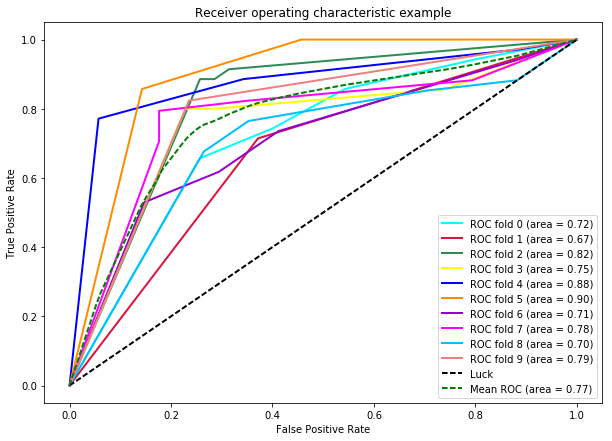

In [17]:
"""
Manual nested cross validation and ROC curve from that

10-fold-------------------------------------------


"""

# ROC curve stuff
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
               'deepskyblue', 'lightcoral'])
lw = 2
i = 0



# Dividing data set for outer cv
cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 43)

precision_scores = []
recall_scores = []
f1_scores = []


# Outer cv
for (train, test), color in zip(cv_outer.split(X_reduced, y), colors):
    pipe_dect = Pipeline([('dect', DecisionTreeClassifier(random_state=1))])
    #param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
    param_grid = [{'dect__criterion': ['gini', 'entropy'], 'dect__max_depth': [3,4,5,6,7,8,9,10,None]},
             {'dect__criterion': ['gini', 'entropy'], 'dect__max_depth': [3,4,5,6,7,8,9,10,None],
             'dect__class_weight': ['balanced']}]

    
    #Inner cv
    cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    gs = GridSearchCV(estimator=pipe_dect, param_grid=param_grid, scoring='f1', cv= cv_inner)
    
    gs.fit(X_reduced[train], y[train])
    
    print gs.best_params_
    
    scores = gs.best_estimator_.predict(X_reduced[test])
    precision_s = precision_score(y[test], scores)
    recall_s = recall_score(y[test], scores)
    f1_s = f1_score(y[test], scores)
    #print scores
    
    precision_scores.append(precision_s)
    recall_scores.append(recall_s)
    f1_scores.append(f1_s)
    print "Precision", precision_s
    print "Recall:", recall_s
    print "F1:", f1_s
    
    probas_ = gs.best_estimator_.predict_proba(X_reduced[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1
    #break
    
print "Precision mean and std:", np.mean(precision_scores), np.std(precision_scores) 
print "Recall mean and std:", np.mean(recall_scores), np.std(recall_scores)
print "F1 mean and std:", np.mean(f1_scores), np.std(f1_scores)

# Draw ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv_outer.get_n_splits(X_reduced, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [12]:
"""
10 fold Manual nested cross validation 50 times
"""
colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
               'deepskyblue', 'lightcoral'])

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93, 103,113,123,133,143,153,163,173,183,193,
                         203,213,223,233,243,253,263,273,283,293, 303,313,323,333,343,353,363,373,383,393,
                          403,413,423,433,443,453,463,473,483,493]
random_seed_list = [2,12,22,32,42,52,62,72,82,92, 102,112,122,132,142,152,162,172,182,192,
                   202,212,222,232,242,252,262,272,282,292, 302,312,322,332,342,352,362,372,382,392,
                   402,412,422,432,442,452,462,472,482,492]

precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []

precision_scores_std_list = []
recall_scores_std_list = []
f1_scores_std_list = []

# Outer cv
for index, rand_seed_i in enumerate(random_seed_list):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    for (train, test), color in zip(cv_outer.split(X_reduced, y), colors):
        pipe_dect = Pipeline([('dect', DecisionTreeClassifier(random_state=1))])
        #param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
        param_grid = [{'dect__criterion': ['gini', 'entropy'], 'dect__max_depth': [3,4,5,6,7,8,9,10,None]},
             {'dect__criterion': ['gini', 'entropy'], 'dect__max_depth': [3,4,5,6,7,8,9,10,None],
             'dect__class_weight': ['balanced']}]


        #Inner cv
        cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rand_seed_i)
        gs = GridSearchCV(estimator=pipe_dect, param_grid=param_grid, scoring='f1', cv= cv_inner)

        gs.fit(X_reduced[train], y[train])

        scores = gs.best_estimator_.predict(X_reduced[test])
        precision_s = precision_score(y[test], scores)
        recall_s = recall_score(y[test], scores)
        f1_s = f1_score(y[test], scores)
        #print scores

        precision_scores.append(precision_s)
        recall_scores.append(recall_s)
        f1_scores.append(f1_s)
        
    print 'Loop:', index
    print 'Precision:', np.mean(precision_scores), np.std(precision_scores) 
    print 'Recall:', np.mean(recall_scores), np.std(recall_scores)
    print 'F1:', np.mean(f1_scores), np.std(f1_scores)
    
    precision_scores_mean_list.append(np.mean(precision_scores))
    recall_scores_mean_list.append(np.mean(recall_scores))
    f1_scores_mean_list.append(np.mean(f1_scores))
    
    precision_scores_std_list.append(np.std(precision_scores))
    recall_scores_std_list.append(np.std(recall_scores))
    f1_scores_std_list.append(np.std(f1_scores))
    
print 'Precision for 50 times:', np.mean(precision_scores_mean_list), np.std(precision_scores_std_list)
print 'Recall for 50 times:', np.mean(recall_scores_mean_list), np.std(recall_scores_std_list)
print 'F1 for 50 times:', np.mean(f1_scores_mean_list), np.std(f1_scores_std_list)

Loop: 0
Precision: 0.766771747157 0.0277003802558
Recall: 0.711176470588 0.0947704327674
F1: 0.734692586829 0.0522592383057
Loop: 1
Precision: 0.767020542941 0.0664507974449
Recall: 0.711008403361 0.0215114561143
F1: 0.736406888042 0.0326585379586
Loop: 2
Precision: 0.761859609437 0.0913458422626
Recall: 0.743109243697 0.0795288807813
F1: 0.750073037894 0.0738216815902
Loop: 3
Precision: 0.738784017207 0.0751122968908
Recall: 0.713697478992 0.0815957732172
F1: 0.722766121062 0.0613892397261
Loop: 4
Precision: 0.793360956966 0.09499181227
Recall: 0.70781512605 0.0966920203406
F1: 0.744374642276 0.0801845264485
Loop: 5
Precision: 0.787133857385 0.0553560633687
Recall: 0.716386554622 0.0898045724817
F1: 0.74565605517 0.0532803371019
Loop: 6
Precision: 0.761208436131 0.0418422998982
Recall: 0.754369747899 0.0607139804011
F1: 0.756850212958 0.0447752225028
Loop: 7
Precision: 0.765500620646 0.0494308381384
Recall: 0.725630252101 0.114550021853
F1: 0.741895112102 0.0800487614333
Loop: 8
Preci

In [6]:
precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []
with open('dec_tree_temp.txt', 'r') as in_handle:
    for line in in_handle:
        if line.split()[0] == 'Precision:':
            precision_scores_mean_list.append(float(line.split()[1]))
        if line.split()[0] == 'Recall:':
            recall_scores_mean_list.append(float(line.split()[1]))
        if line.split()[0] == 'F1:':
            f1_scores_mean_list.append(float(line.split()[1]))
            
print 'Precision mean for 50 times:', np.mean(precision_scores_mean_list), 'Std. error:', stats.sem(precision_scores_mean_list)
print 'Recall mean for 50 times:', np.mean(recall_scores_mean_list), 'Std. error:', stats.sem(recall_scores_mean_list)
print 'F1 mean for 50 times:', np.mean(f1_scores_mean_list), 'Std. error:', stats.sem(f1_scores_mean_list)
     

Precision mean for 50 times: 0.755204241674 Std. error: 0.00278740418579
Recall mean for 50 times: 0.719297478992 Std. error: 0.00259384047849
F1 mean for 50 times: 0.73354203282 Std. error: 0.00194939546205


## Random Forest Classifier - input compressed

{'randf__n_estimators': 17, 'randf__criterion': 'gini', 'randf__max_depth': None}
Precision 0.764705882353
Recall: 0.742857142857
F1: 0.753623188406
{'randf__n_estimators': 17, 'randf__criterion': 'gini', 'randf__max_depth': 10}
Precision 0.828571428571
Recall: 0.828571428571
F1: 0.828571428571
{'randf__n_estimators': 17, 'randf__criterion': 'entropy', 'randf__max_depth': 7}
Precision 0.815789473684
Recall: 0.885714285714
F1: 0.849315068493
{'randf__n_estimators': 20, 'randf__criterion': 'entropy', 'randf__max_depth': 8}
Precision 0.878787878788
Recall: 0.828571428571
F1: 0.852941176471
{'randf__n_estimators': 10, 'randf__criterion': 'entropy', 'randf__max_depth': 8}
Precision 0.852941176471
Recall: 0.828571428571
F1: 0.840579710145
{'randf__n_estimators': 17, 'randf__criterion': 'gini', 'randf__max_depth': 9}
Precision 0.909090909091
Recall: 0.857142857143
F1: 0.882352941176
{'randf__n_estimators': 15, 'randf__criterion': 'gini', 'randf__max_depth': 10}
Precision 0.741935483871
Recall

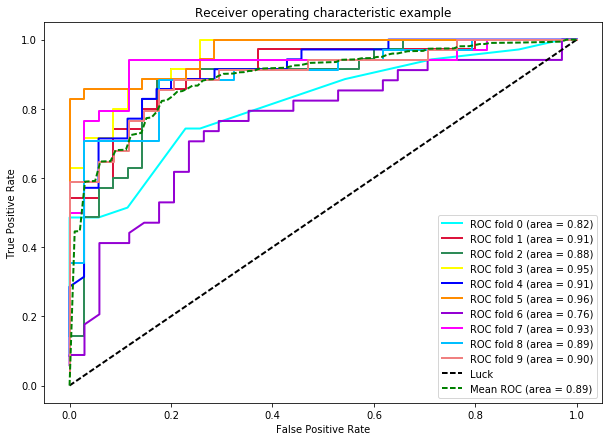

In [18]:
"""
Manual nested cross validation and ROC curve from that

10-fold-------------------------------------------


"""

# ROC curve stuff
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
               'deepskyblue', 'lightcoral'])
lw = 2
i = 0



# Dividing data set for outer cv
cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 43)

precision_scores = []
recall_scores = []
f1_scores = []


# Outer cv
for (train, test), color in zip(cv_outer.split(X_reduced, y), colors):
    pipe_randf = Pipeline([('randf', RandomForestClassifier(random_state=1))])
    #param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
    param_grid = [{'randf__n_estimators': [10, 13, 15, 17, 20], 'randf__criterion': ['gini', 'entropy'], 
               'randf__max_depth': [3,4,5,6,7,8,9,10,None]},
             {'randf__n_estimators': [10, 13, 15, 17, 20], 'randf__criterion': ['gini', 'entropy'], 
              'randf__max_depth': [3,4,5,6,7,8,9,10,None], 'randf__class_weight': ['balanced']}]

    
    #Inner cv
    cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    gs = GridSearchCV(estimator=pipe_randf, param_grid=param_grid, scoring='f1', cv= cv_inner)
    
    gs.fit(X_reduced[train], y[train])
    
    print gs.best_params_
    
    scores = gs.best_estimator_.predict(X_reduced[test])
    precision_s = precision_score(y[test], scores)
    recall_s = recall_score(y[test], scores)
    f1_s = f1_score(y[test], scores)
    #print scores
    
    precision_scores.append(precision_s)
    recall_scores.append(recall_s)
    f1_scores.append(f1_s)
    print "Precision", precision_s
    print "Recall:", recall_s
    print "F1:", f1_s
    
    probas_ = gs.best_estimator_.predict_proba(X_reduced[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1
    #break
    
print "Precision mean and std:", np.mean(precision_scores), np.std(precision_scores) 
print "Recall mean and std:", np.mean(recall_scores), np.std(recall_scores)
print "F1 mean and std:", np.mean(f1_scores), np.std(f1_scores)

# Draw ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv_outer.get_n_splits(X_reduced, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [13]:
"""
10 fold Manual nested cross validation 50 times
"""
colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
               'deepskyblue', 'lightcoral'])

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93, 103,113,123,133,143,153,163,173,183,193,
                         203,213,223,233,243,253,263,273,283,293, 303,313,323,333,343,353,363,373,383,393,
                          403,413,423,433,443,453,463,473,483,493]
random_seed_list = [2,12,22,32,42,52,62,72,82,92, 102,112,122,132,142,152,162,172,182,192,
                   202,212,222,232,242,252,262,272,282,292, 302,312,322,332,342,352,362,372,382,392,
                   402,412,422,432,442,452,462,472,482,492]

precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []

precision_scores_std_list = []
recall_scores_std_list = []
f1_scores_std_list = []

# Outer cv
for index, rand_seed_i in enumerate(random_seed_list):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    for (train, test), color in zip(cv_outer.split(X_reduced, y), colors):
        pipe_randf = Pipeline([('randf', RandomForestClassifier(random_state=1))])
        #param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
        param_grid = [{'randf__n_estimators': [10, 13, 15, 17, 20], 'randf__criterion': ['gini', 'entropy'], 
               'randf__max_depth': [3,4,5,6,7,8,9,10,None]},
             {'randf__n_estimators': [10, 13, 15, 17, 20], 'randf__criterion': ['gini', 'entropy'], 
              'randf__max_depth': [3,4,5,6,7,8,9,10,None], 'randf__class_weight': ['balanced']}]


        #Inner cv
        cv_inner = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rand_seed_i)
        gs = GridSearchCV(estimator=pipe_randf, param_grid=param_grid, scoring='f1', cv= cv_inner)

        gs.fit(X_reduced[train], y[train])

        scores = gs.best_estimator_.predict(X_reduced[test])
        precision_s = precision_score(y[test], scores)
        recall_s = recall_score(y[test], scores)
        f1_s = f1_score(y[test], scores)
        #print scores

        precision_scores.append(precision_s)
        recall_scores.append(recall_s)
        f1_scores.append(f1_s)
        
    print 'Loop:', index
    print 'Precision:', np.mean(precision_scores), np.std(precision_scores) 
    print 'Recall:', np.mean(recall_scores), np.std(recall_scores)
    print 'F1:', np.mean(f1_scores), np.std(f1_scores)
    
    precision_scores_mean_list.append(np.mean(precision_scores))
    recall_scores_mean_list.append(np.mean(recall_scores))
    f1_scores_mean_list.append(np.mean(f1_scores))
    
    precision_scores_std_list.append(np.std(precision_scores))
    recall_scores_std_list.append(np.std(recall_scores))
    f1_scores_std_list.append(np.std(f1_scores))
    
print 'Precision for 50 times:', np.mean(precision_scores_mean_list), np.std(precision_scores_std_list)
print 'Recall for 50 times:', np.mean(recall_scores_mean_list), np.std(recall_scores_std_list)
print 'F1 for 50 times:', np.mean(f1_scores_mean_list), np.std(f1_scores_std_list)

Loop: 0
Precision: 0.839677855746 0.0436346819938
Recall: 0.798319327731 0.0786718003573
F1: 0.81687185342 0.0527164324082
Loop: 1
Precision: 0.83351622299 0.0398542271739
Recall: 0.753781512605 0.0823049079608
F1: 0.788469439313 0.0476747388142
Loop: 2
Precision: 0.8436023245 0.0627257291699
Recall: 0.789243697479 0.096218891049
F1: 0.811828722327 0.0655599806736
Loop: 3
Precision: 0.827792815932 0.0450055696547
Recall: 0.752100840336 0.0895752596307
F1: 0.784623820994 0.0537700627461
Loop: 4
Precision: 0.844455489492 0.0518155163945
Recall: 0.785630252101 0.103573908641
F1: 0.81121067103 0.0707891302083
Loop: 5
Precision: 0.829163863789 0.0649850669866
Recall: 0.76025210084 0.0907866818125
F1: 0.789555286411 0.0610765787847
Loop: 6
Precision: 0.800069521085 0.0520614927581
Recall: 0.757226890756 0.0524715060832
F1: 0.776294012916 0.0373124557206
Loop: 7
Precision: 0.827942747486 0.0524245535162
Recall: 0.776890756303 0.0753798375349
F1: 0.79922798469 0.0528084995498
Loop: 8
Precision

In [4]:
precision_scores_mean_list = []
recall_scores_mean_list = []
f1_scores_mean_list = []
with open('rand_forest_temp.txt', 'r') as in_handle:
    for line in in_handle:
        if line.split()[0] == 'Precision:':
            precision_scores_mean_list.append(float(line.split()[1]))
        if line.split()[0] == 'Recall:':
            recall_scores_mean_list.append(float(line.split()[1]))
        if line.split()[0] == 'F1:':
            f1_scores_mean_list.append(float(line.split()[1]))
            
print 'Precision mean for 50 times:', np.mean(precision_scores_mean_list), 'Std. error:', stats.sem(precision_scores_mean_list)
print 'Recall mean for 50 times:', np.mean(recall_scores_mean_list), 'Std. error:', stats.sem(recall_scores_mean_list)
print 'F1 mean for 50 times:', np.mean(f1_scores_mean_list), 'Std. error:', stats.sem(f1_scores_mean_list)
     

Precision mean for 50 times: 0.833166142881 Std. error: 0.00205436655362
Recall mean for 50 times: 0.773401680672 Std. error: 0.00194454704956
F1 mean for 50 times: 0.799723045691 Std. error: 0.00153928406518
